# Découverte de PVDAQ - Farm Solar Array - 2024

In [7]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# On a récupéré le dataset PVDAQ pour le système Farm Solar Array pour l'année 2024
# https://openei.org/wiki/PVDAQ/Sites/Farm_Solar_Array

df_elec1 = pd.read_csv("pvdaq_data_2024/2107_electrical_data_2024.csv", parse_dates=['measured_on'])
df_env1  = pd.read_csv("pvdaq_data_2024/2107_environment_data_2024.csv", parse_dates=['measured_on'])
df_irr1  = pd.read_csv("pvdaq_data_2024/2107_irradiance_data_2024.csv", parse_dates=['measured_on'])
df_meter1 = pd.read_csv("pvdaq_data_2024/2107_meter_15m_data_2024.csv", parse_dates=['measured_on'])

df_elec2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_electrical_data_v1.csv", parse_dates=['measured_on'])
df_env2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_environment_data.csv", parse_dates=['measured_on'])
df_irr2  = pd.read_csv("pvdaq_data_2017_a_2023/2107_irradiance_data.csv", parse_dates=['measured_on'])
df_meter2 = pd.read_csv("pvdaq_data_2017_a_2023/2107_meter_15m_data.csv", parse_dates=['measured_on'])

# Concaténation
df_elec = pd.concat([df_elec2, df_elec1], ignore_index=True)
df_env = pd.concat([df_env2, df_env1], ignore_index=True)
df_irr = pd.concat([df_irr2, df_irr1], ignore_index=True)
df_meter = pd.concat([df_meter2, df_meter1], ignore_index=True)

#### Nettoyage des identifiants des capteurs à la fin des noms des colonnes pour plus de clarté.

In [9]:
def clean_column_name(col):
    # supprime _inv_XXXXX ou _o_XXXXX
    return re.sub(r"_(inv|o|meter)_[0-9]+$", "", col)

df_elec.columns = [clean_column_name(c) for c in df_elec.columns]
df_env.columns = [clean_column_name(c) for c in df_env.columns]
df_irr.columns = [clean_column_name(c) for c in df_irr.columns]
df_meter.columns = [clean_column_name(c) for c in df_meter.columns]

print(df_elec.columns)
print(df_env.columns)
print(df_irr.columns)
print(df_meter.columns)


Index(['measured_on', 'inv_01_dc_current', 'inv_01_dc_voltage',
       'inv_01_ac_current', 'inv_01_ac_voltage', 'inv_01_ac_power',
       'inv_02_dc_current', 'inv_02_dc_voltage', 'inv_02_ac_current',
       'inv_02_ac_voltage',
       ...
       'inv_23_dc_voltage', 'inv_23_ac_current', 'inv_23_ac_voltage',
       'inv_23_ac_power', 'inv_24_dc_current', 'inv_24_dc_voltage',
       'inv_24_ac_current', 'inv_24_ac_voltage', 'inv_24_ac_power',
       'inv_05_dc_voltage'],
      dtype='object', length=121)
Index(['measured_on', 'ambient_temperature', 'wind_speed', 'wind_direction'], dtype='object')
Index(['measured_on', 'poa_irradiance'], dtype='object')
Index(['measured_on', 'meter_revenue_grade_ac_output'], dtype='object')


#### On merge les 4 dataset ensemble

On convertit les colonnes "measured_on" en datetime ce qui permet un merge exact et on garde seulement les timestamps communs à tous les datasets.

In [10]:
for df in [df_elec, df_env, df_irr, df_meter]:
    df['measured_on'] = pd.to_datetime(df['measured_on'])

In [11]:
merged = df_elec.merge(df_env, on='measured_on', how='inner') \
            .merge(df_irr, on='measured_on', how='inner') \
            .merge(df_meter, on='measured_on', how='inner')

## **Exploration du dataset mergé**

In [12]:
merged.head()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
0,2017-12-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,38.8,1.2,156.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.0,2.6,247.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,37.5,1.9,265.0,0.0,0.0


In [13]:
print(merged.dtypes)

measured_on                      datetime64[ns]
inv_01_dc_current                       float64
inv_01_dc_voltage                       float64
inv_01_ac_current                       float64
inv_01_ac_voltage                       float64
                                      ...      
ambient_temperature                     float64
wind_speed                              float64
wind_direction                          float64
poa_irradiance                          float64
meter_revenue_grade_ac_output           float64
Length: 126, dtype: object


In [14]:
print(merged.shape)

(199711, 126)


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199711 entries, 0 to 199710
Columns: 126 entries, measured_on to meter_revenue_grade_ac_output
dtypes: datetime64[ns](1), float64(125)
memory usage: 192.0 MB


In [16]:
merged.describe()

,measured_on,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,inv_01_ac_power,inv_02_dc_current,inv_02_dc_voltage,inv_02_ac_current,inv_02_ac_voltage,...,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power,inv_05_dc_voltage,ambient_temperature,wind_speed,wind_direction,poa_irradiance,meter_revenue_grade_ac_output
count,199711,199711.000000,199711.000000,199711.000000,199711.00000,199711.000000,199711.000000,199711.000000,199711.000000,199711.000000,...,199711.000000,199711.000000,199711.000000,199711.000000,24391.000000,199580.000000,199695.000000,199703.000000,199711.000000,199711.000000
mean,2021-04-02 17:11:27.283624448,11.746963,374.509008,8.844126,160.33289,7.545081,11.040920,371.208704,8.339900,159.173965,...,381.964213,8.650573,163.534551,7.395053,421.243825,63.591876,5.701643,182.215397,268.612198,180.572732
min,2017-12-01 00:15:00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,23.400000,1.000000,0.000000,0.000000,0.000000
25%,2019-07-04 16:52:30,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,51.500000,2.900000,120.000000,0.000000,0.000000
50%,2021-02-28 10:45:00,1.200000,612.634000,1.339000,279.06700,0.315000,0.447000,598.655000,1.059000,279.632000,...,608.976000,1.420000,279.779000,0.110000,614.169000,62.300000,4.400000,153.000000,38.200000,17.280000
75%,2022-12-15 14:37:30,22.907500,682.601500,17.754000,287.11600,15.188000,20.892000,681.457000,16.327000,287.848000,...,687.603000,17.098000,286.894000,14.718500,672.739500,75.100000,7.300000,262.000000,546.600000,381.440000
max,2024-11-01 23:15:00,52.160000,909.840000,36.338000,310.67700,30.085000,54.844000,1750.755000,35.907000,310.436000,...,912.795000,35.848000,310.605000,30.089000,851.387000,115.600000,30.900000,360.000000,1400.000000,1783.680000
std,NaN,16.123177,334.581506,11.883779,142.14886,10.400228,15.801546,334.134676,11.564696,142.679477,...,335.311388,11.798319,141.548783,10.384771,314.551821,15.687559,4.013714,98.294213,348.407287,234.373358


Valeurs manquantes

In [17]:
missing = merged.isna().sum()
missing = missing[missing > 0]

print(missing)


inv_05_dc_voltage      175320
ambient_temperature       131
wind_speed                 16
wind_direction              8
dtype: int64


In [18]:
print("Plage des dates où les mesures ont été réalisées")
print(merged['measured_on'].min())
print(merged['measured_on'].max())


print("\nNombre de points par jours en moyenne")
daily_counts = merged['measured_on'].dt.date.value_counts().sort_index()
print(np.average(daily_counts))

Plage des dates où les mesures ont été réalisées
2017-12-01 00:15:00
2024-11-01 23:15:00

Nombre de points par jours en moyenne
83.4563309653155


In [19]:
cols_of_interest = [ 
    "measured_on",
    "poa_irradiance",
    "wind_speed",
    "wind_direction",
    "ambient_temperature",
    "meter_revenue_grade_ac_output",
]

colonnes_a_ajouter = [
"inv_01_dc_current","inv_01_dc_voltage","inv_01_ac_current","inv_01_ac_voltage","inv_01_ac_power",
"inv_02_dc_current","inv_02_dc_voltage","inv_02_ac_current","inv_02_ac_voltage","inv_02_ac_power",
"inv_03_dc_current","inv_03_dc_voltage","inv_03_ac_current","inv_03_ac_voltage","inv_03_ac_power",
"inv_04_dc_current","inv_04_dc_voltage","inv_04_ac_current","inv_04_ac_voltage","inv_04_ac_power",
"inv_05_dc_current","inv_05_dc_voltage","inv_05_ac_current","inv_05_ac_voltage","inv_05_ac_power",
"inv_06_dc_current","inv_06_dc_voltage","inv_06_ac_current","inv_06_ac_voltage","inv_06_ac_power",
"inv_07_dc_current","inv_07_dc_voltage","inv_07_ac_current","inv_07_ac_voltage","inv_07_ac_power",
"inv_08_dc_current","inv_08_dc_voltage","inv_08_ac_current","inv_08_ac_voltage","inv_08_ac_power",
"inv_09_dc_current","inv_09_dc_voltage","inv_09_ac_current","inv_09_ac_voltage","inv_09_ac_power",
"inv_10_dc_current","inv_10_dc_voltage","inv_10_ac_current","inv_10_ac_voltage","inv_10_ac_power",
"inv_11_dc_current","inv_11_dc_voltage","inv_11_ac_current","inv_11_ac_voltage","inv_11_ac_power",
"inv_12_dc_current","inv_12_dc_voltage","inv_12_ac_current","inv_12_ac_voltage","inv_12_ac_power",
"inv_13_dc_current","inv_13_dc_voltage","inv_13_ac_current","inv_13_ac_voltage","inv_13_ac_power",
"inv_14_dc_current","inv_14_dc_voltage","inv_14_ac_current","inv_14_ac_voltage","inv_14_ac_power",
"inv_15_dc_current","inv_15_dc_voltage","inv_15_ac_current","inv_15_ac_voltage","inv_15_ac_power",
"inv_16_dc_current","inv_16_dc_voltage","inv_16_ac_current","inv_16_ac_voltage","inv_16_ac_power",
"inv_17_dc_current","inv_17_dc_voltage","inv_17_ac_current","inv_17_ac_voltage","inv_17_ac_power",
"inv_18_dc_current","inv_18_dc_voltage","inv_18_ac_current","inv_18_ac_voltage","inv_18_ac_power",
"inv_19_dc_current","inv_19_dc_voltage","inv_19_ac_current","inv_19_ac_voltage","inv_19_ac_power",
"inv_20_dc_current","inv_20_dc_voltage","inv_20_ac_current","inv_20_ac_voltage","inv_20_ac_power",
"inv_21_dc_current","inv_21_dc_voltage","inv_21_ac_current","inv_21_ac_voltage","inv_21_ac_power",
"inv_22_dc_current","inv_22_dc_voltage","inv_22_ac_current","inv_22_ac_voltage","inv_22_ac_power",
"inv_23_dc_current","inv_23_dc_voltage","inv_23_ac_current","inv_23_ac_voltage","inv_23_ac_power",
"inv_24_dc_current","inv_24_dc_voltage","inv_24_ac_current","inv_24_ac_voltage","inv_24_ac_power"
]


cols_of_interest += colonnes_a_ajouter

df = merged[cols_of_interest].copy()
df


,measured_on,poa_irradiance,wind_speed,wind_direction,ambient_temperature,meter_revenue_grade_ac_output,inv_01_dc_current,inv_01_dc_voltage,inv_01_ac_current,inv_01_ac_voltage,...,inv_23_dc_current,inv_23_dc_voltage,inv_23_ac_current,inv_23_ac_voltage,inv_23_ac_power,inv_24_dc_current,inv_24_dc_voltage,inv_24_ac_current,inv_24_ac_voltage,inv_24_ac_power
0,2017-12-01 00:15:00,0.0,1.2,156.0,38.8,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-01 01:00:00,0.0,2.6,247.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01 01:30:00,0.0,2.6,247.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01 01:45:00,0.0,2.6,247.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01 02:00:00,0.0,1.9,265.0,37.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199706,2024-11-01 21:45:00,0.0,13.1,109.0,55.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199707,2024-11-01 22:15:00,0.0,12.9,107.0,54.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199708,2024-11-01 22:45:00,0.0,12.9,107.0,54.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199709,2024-11-01 23:00:00,0.0,11.7,99.0,54.3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Affichages 

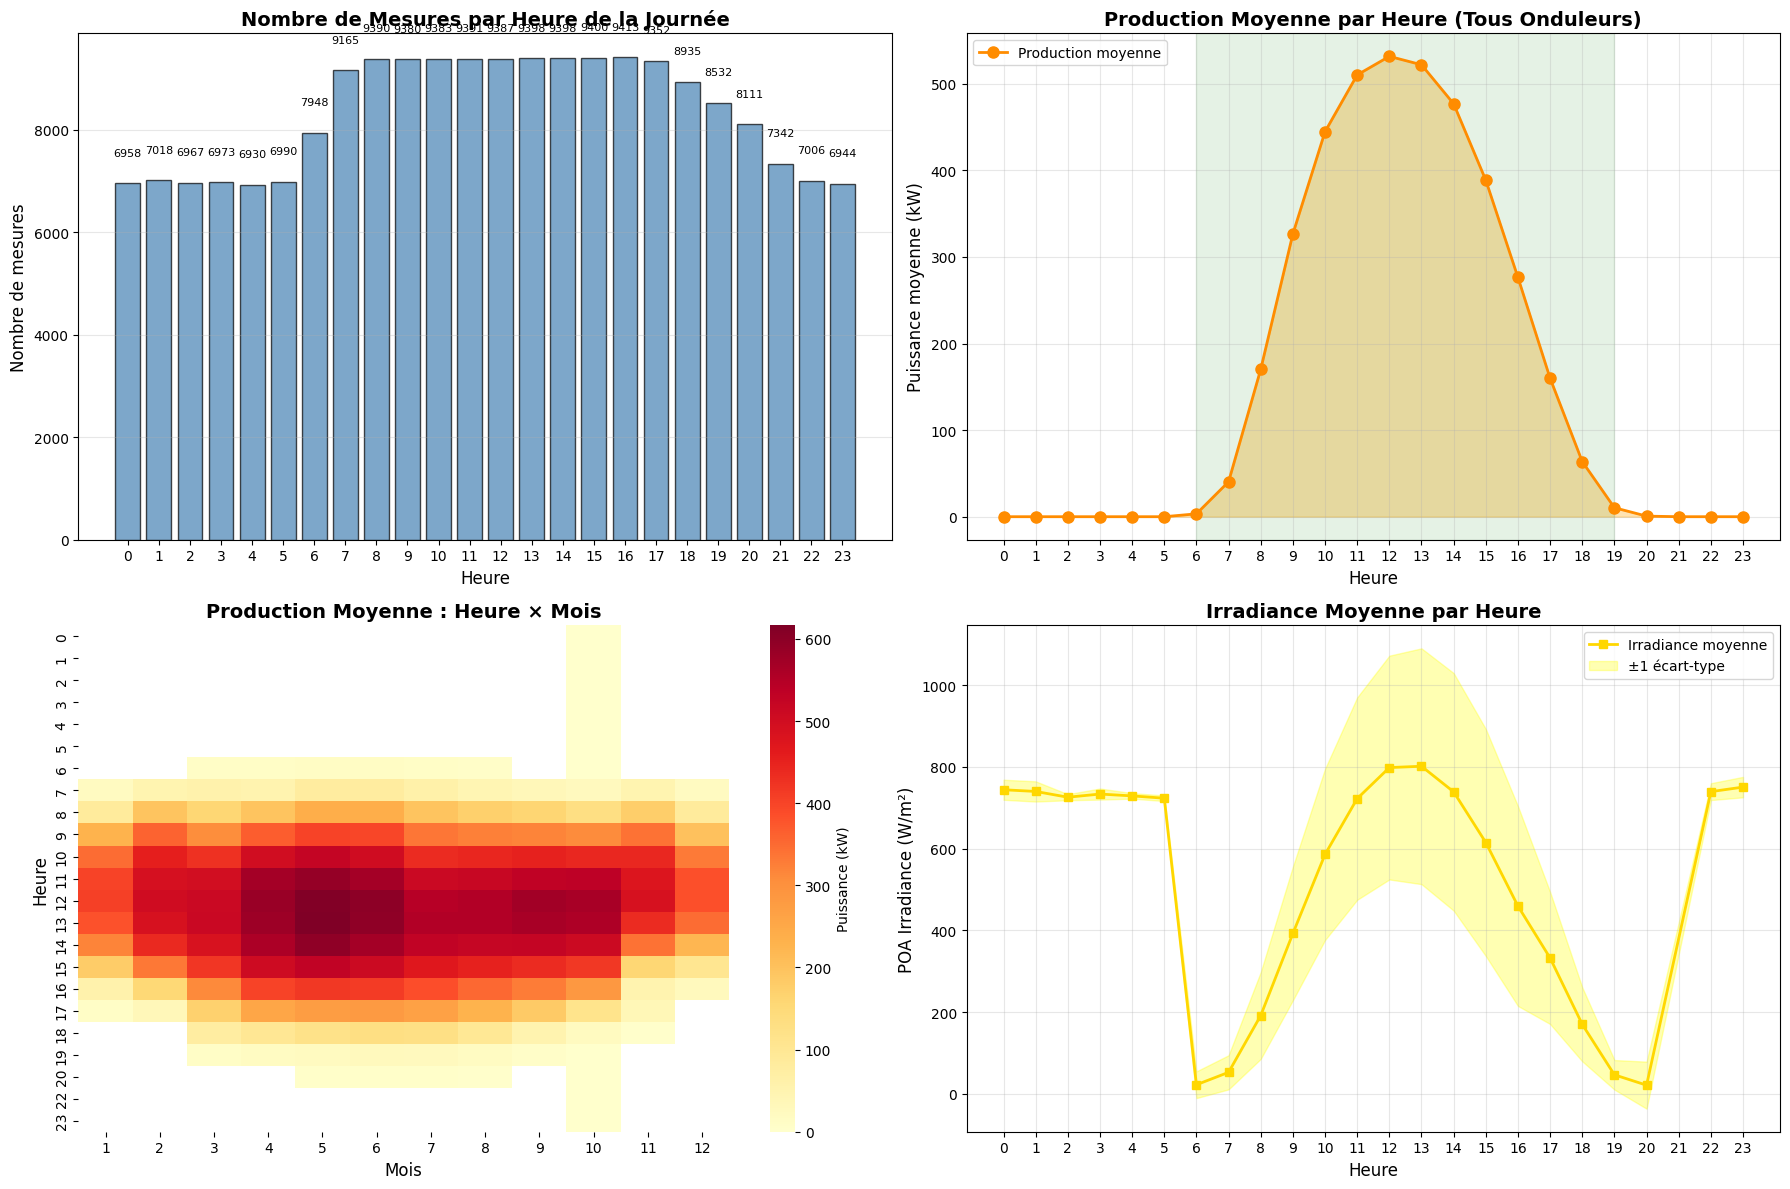


ANALYSE DES HEURES DE PRODUCTION

Heures avec production enregistrée : [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Plage horaire de production : 6h - 19h
Durée moyenne de production : 13 heures

Production totale moyenne : 3926.22 kW·h/jour
Pic de production à : 12h (531.77 kW)
Irradiance maximale à : 13h (801.65 W/m²)


In [20]:
# === ANALYSE DES HEURES DE PRODUCTION ===

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- Subplot 1 : Distribution des mesures par heure ---
df['hour'] = df['measured_on'].dt.hour
df['month'] = df['measured_on'].dt.month
hourly_counts = df['hour'].value_counts().sort_index()

axes[0, 0].bar(hourly_counts.index, hourly_counts.values, 
               color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Nombre de Mesures par Heure de la Journée', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Heure', fontsize=12)
axes[0, 0].set_ylabel('Nombre de mesures', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_xticks(range(0, 24))

# Ajouter annotations
for i, v in enumerate(hourly_counts.values):
    if v > 0:
        axes[0, 0].text(hourly_counts.index[i], v + 500, str(v), 
                       ha='center', va='bottom', fontsize=8)

# --- Subplot 2 : Production moyenne par heure (tous onduleurs) ---
# Calculer la production totale moyenne par heure
total_power_cols = [col for col in df.columns if 'ac_power' in col]
df['total_power'] = df[total_power_cols].sum(axis=1)

hourly_avg_power = df.groupby('hour')['total_power'].mean()

axes[0, 1].plot(hourly_avg_power.index, hourly_avg_power.values, 
                marker='o', linewidth=2, markersize=8, color='darkorange', label='Production moyenne')
axes[0, 1].fill_between(hourly_avg_power.index, 0, hourly_avg_power.values, 
                         alpha=0.3, color='orange')
axes[0, 1].set_title('Production Moyenne par Heure (Tous Onduleurs)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Heure', fontsize=12)
axes[0, 1].set_ylabel('Puissance moyenne (kW)', fontsize=12)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(range(0, 24))
axes[0, 1].legend()

# Identifier heures de production
production_hours = hourly_avg_power[hourly_avg_power > 1.0].index.tolist()  # Seuil 1 kW
axes[0, 1].axvspan(min(production_hours), max(production_hours), 
                   alpha=0.1, color='green', label='Période de production')

# --- Subplot 3 : Heatmap Production par heure et mois ---
df_day = df[df['poa_irradiance'] > 10].copy()  # Filtrer heures de jour
pivot_power = df_day.pivot_table(
    index='hour', 
    columns='month', 
    values='total_power', 
    aggfunc='mean'
)

sns.heatmap(pivot_power, ax=axes[1, 0], cmap='YlOrRd', cbar_kws={'label': 'Puissance (kW)'})
axes[1, 0].set_title('Production Moyenne : Heure × Mois', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Mois', fontsize=12)
axes[1, 0].set_ylabel('Heure', fontsize=12)

# --- Subplot 4 : Distribution irradiance par heure ---
hourly_irr = df_day.groupby('hour')['poa_irradiance'].agg(['mean', 'std'])

axes[1, 1].plot(hourly_irr.index, hourly_irr['mean'], 
                marker='s', linewidth=2, markersize=6, color='gold', label='Irradiance moyenne')
axes[1, 1].fill_between(hourly_irr.index, 
                        hourly_irr['mean'] - hourly_irr['std'], 
                        hourly_irr['mean'] + hourly_irr['std'], 
                        alpha=0.3, color='yellow', label='±1 écart-type')
axes[1, 1].set_title('Irradiance Moyenne par Heure', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Heure', fontsize=12)
axes[1, 1].set_ylabel('POA Irradiance (W/m²)', fontsize=12)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xticks(range(0, 24))
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('hourly_production_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# === RÉSUMÉ TEXTUEL ===
print("\n" + "="*60)
print("ANALYSE DES HEURES DE PRODUCTION")
print("="*60)
print(f"\nHeures avec production enregistrée : {production_hours}")
print(f"Plage horaire de production : {min(production_hours)}h - {max(production_hours)}h")
print(f"Durée moyenne de production : {max(production_hours) - min(production_hours)} heures")
print(f"\nProduction totale moyenne : {hourly_avg_power.sum():.2f} kW·h/jour")
print(f"Pic de production à : {hourly_avg_power.idxmax()}h ({hourly_avg_power.max():.2f} kW)")
print(f"Irradiance maximale à : {hourly_irr['mean'].idxmax()}h ({hourly_irr['mean'].max():.2f} W/m²)")

## Choix du panneau de référence

Pour reproduire la configuration de référence lu dans les papiers de recherches, nous devons identifié un panneau de référence. Pour choisir on prend un panneau dans la moyenne pour ne pas biaisé les statistiques. Même si l'idéal serait un panneau de référence dédié à ça.


PANNEAU DE RÉFÉRENCE SÉLECTIONNÉ : inv_11_ac_power
Corrélation moyenne avec autres onduleurs : 0.9093
Corrélation minimale : 0.8024
Corrélation maximale : 1.0000


C:\Users\Claire\AppData\Local\Temp\ipykernel_78452\2450707502.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot(data_for_box, labels=[col.replace('inv_', '').replace('_ac_power', '')


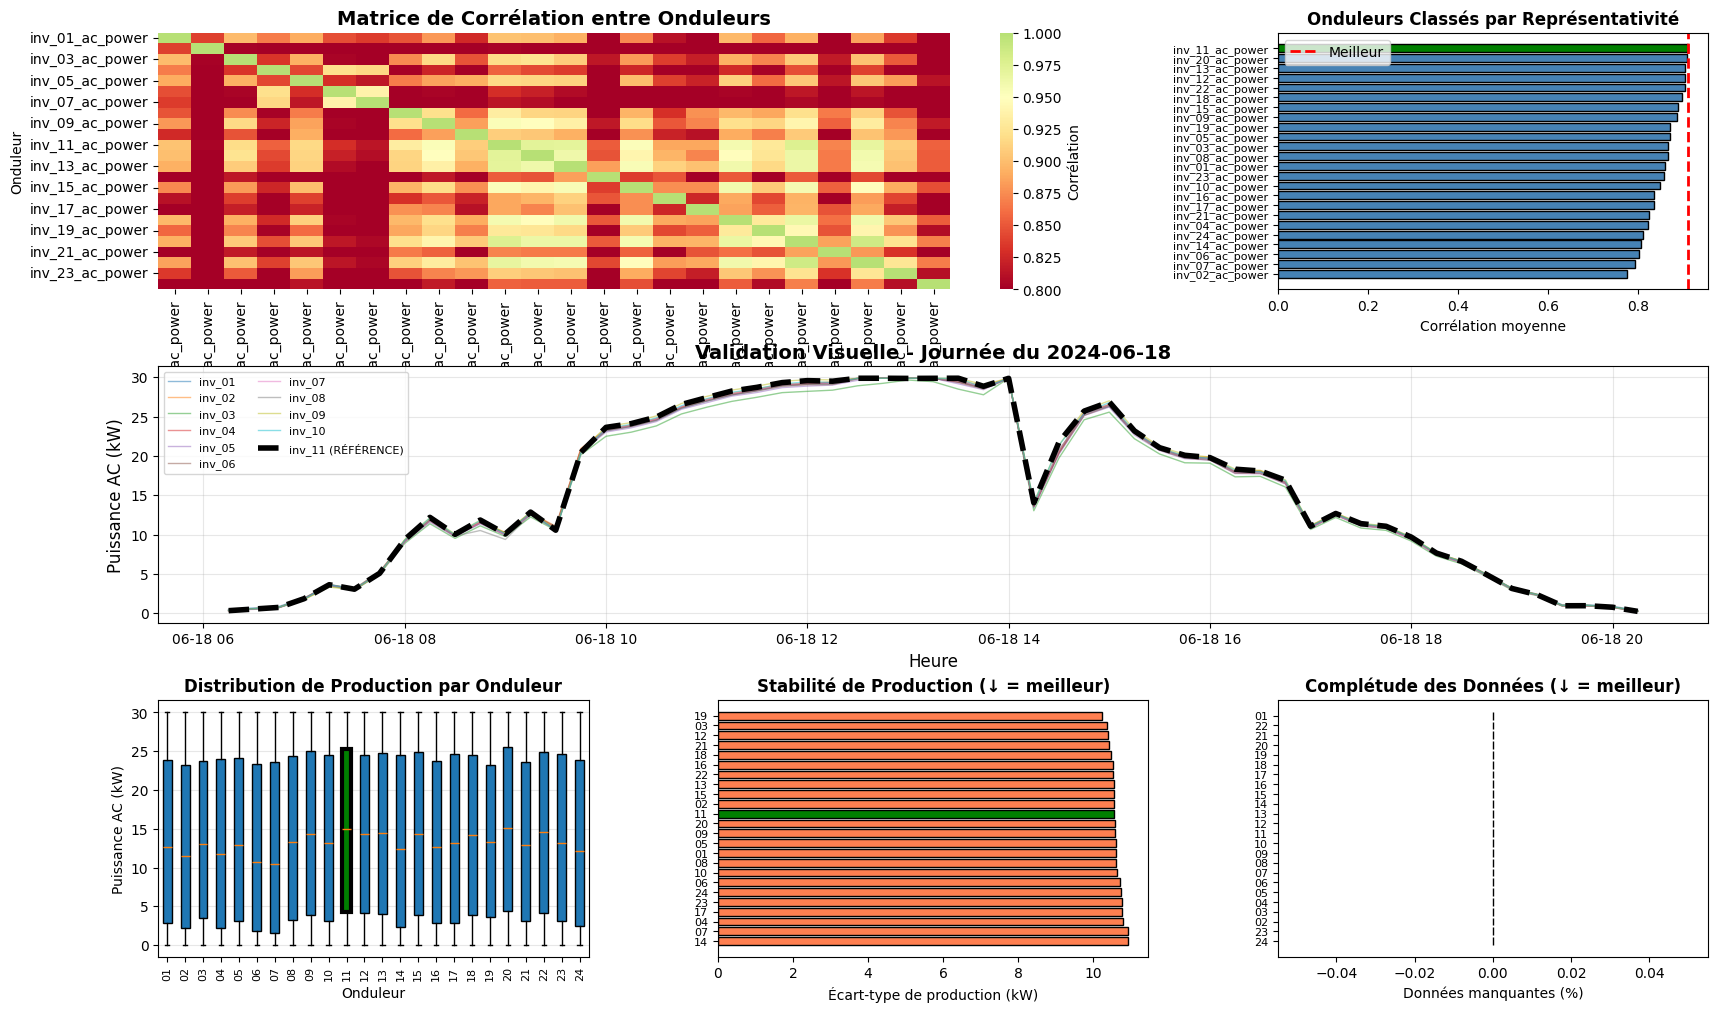


JUSTIFICATION DU CHOIX

✓ Corrélation moyenne : 0.9093 (1er/24)
✓ Écart-type production : 10.57 kW (rang 11/24)
✓ Données manquantes : 0.00% (rang 13/24)
✓ Production médiane : 14.91 kW (médiane globale: 13.14 kW)
  → ⚠️ Écart significatif de la médiane, à vérifier


In [21]:
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# --- 1. Matrice de corrélation entre tous les onduleurs ---
power_cols = [col for col in df_day.columns if 'ac_power' in col and 'inv' in col]
corr_matrix = df_day[power_cols].corr()

ax1 = fig.add_subplot(gs[0, :2])
sns.heatmap(corr_matrix, annot=False, cmap='RdYlGn', center=0.95, 
            vmin=0.8, vmax=1.0, ax=ax1, cbar_kws={'label': 'Corrélation'})
ax1.set_title('Matrice de Corrélation entre Onduleurs', fontsize=14, fontweight='bold')
ax1.set_xlabel('Onduleur', fontsize=10)
ax1.set_ylabel('Onduleur', fontsize=10)

# --- 2. Score de corrélation moyenne par onduleur ---
corr_sums = corr_matrix.sum().sort_values(ascending=False)
corr_avg = corr_sums / len(power_cols)

ax2 = fig.add_subplot(gs[0, 2])
colors = ['green' if i == 0 else 'steelblue' for i in range(len(corr_avg))]
ax2.barh(range(len(corr_avg)), corr_avg.values, color=colors, edgecolor='black')
ax2.set_yticks(range(len(corr_avg)))
ax2.set_yticklabels(corr_avg.index, fontsize=8)
ax2.set_xlabel('Corrélation moyenne', fontsize=10)
ax2.set_title('Onduleurs Classés par Représentativité', fontsize=12, fontweight='bold')
ax2.axvline(corr_avg.iloc[0], color='red', linestyle='--', linewidth=2, label='Meilleur')
ax2.legend()
ax2.invert_yaxis()

# Sélection du référent
reference_inv = corr_sums.index[0]
print(f"\n{'='*60}")
print(f"PANNEAU DE RÉFÉRENCE SÉLECTIONNÉ : {reference_inv}")
print(f"{'='*60}")
print(f"Corrélation moyenne avec autres onduleurs : {corr_avg.iloc[0]:.4f}")
print(f"Corrélation minimale : {corr_matrix[reference_inv].min():.4f}")
print(f"Corrélation maximale : {corr_matrix[reference_inv].max():.4f}")

# --- 3. Validation visuelle : Journée typique ---
# S'assurer que df_day a une colonne 'date' puis choisir un jour échantillon
if 'date' not in df_day.columns:
    df_day['date'] = df_day['measured_on'].dt.date

vc = df_day['date'].value_counts()
# Si au moins 101 jours classés, prendre l'élément 100, sinon prendre le plus fréquent
sample_date = vc.index[100] if len(vc) > 100 else vc.index[0]
sample_day = df_day[df_day['date'] == sample_date].sort_values('measured_on')

ax3 = fig.add_subplot(gs[1, :])
for col in power_cols[:10]:  # 10 premiers onduleurs
    ax3.plot(sample_day['measured_on'], sample_day[col], 
             label=col.replace('_ac_power', ''), alpha=0.5, linewidth=1)

# Référence en épais
ax3.plot(sample_day['measured_on'], sample_day[reference_inv], 
         label=f'{reference_inv.replace("_ac_power", "")} (RÉFÉRENCE)', 
         linewidth=4, color='black', linestyle='--')

ax3.set_title(f'Validation Visuelle - Journée du {sample_date}', fontsize=14, fontweight='bold')
ax3.set_xlabel('Heure', fontsize=12)
ax3.set_ylabel('Puissance AC (kW)', fontsize=12)
ax3.legend(loc='upper left', fontsize=8, ncol=2)
ax3.grid(alpha=0.3)

# --- 4. Boxplot des productions par onduleur ---
ax4 = fig.add_subplot(gs[2, 0])
data_for_box = [df_day[col].dropna() for col in power_cols]
bp = ax4.boxplot(data_for_box, labels=[col.replace('inv_', '').replace('_ac_power', '') 
                                        for col in power_cols], 
                 patch_artist=True, showfliers=False)

# Colorer la référence
ref_idx = power_cols.index(reference_inv)
bp['boxes'][ref_idx].set_facecolor('green')
bp['boxes'][ref_idx].set_linewidth(3)

ax4.set_title('Distribution de Production par Onduleur', fontsize=12, fontweight='bold')
ax4.set_xlabel('Onduleur', fontsize=10)
ax4.set_ylabel('Puissance AC (kW)', fontsize=10)
ax4.tick_params(axis='x', rotation=90, labelsize=8)
ax4.grid(axis='y', alpha=0.3)

# --- 5. Variance de production (stabilité) ---
ax5 = fig.add_subplot(gs[2, 1])
power_std = df_day[power_cols].std().sort_values()
colors_std = ['green' if col == reference_inv else 'coral' for col in power_std.index]

ax5.barh(range(len(power_std)), power_std.values, color=colors_std, edgecolor='black')
ax5.set_yticks(range(len(power_std)))
ax5.set_yticklabels([col.replace('inv_', '').replace('_ac_power', '') 
                      for col in power_std.index], fontsize=8)
ax5.set_xlabel('Écart-type de production (kW)', fontsize=10)
ax5.set_title('Stabilité de Production (↓ = meilleur)', fontsize=12, fontweight='bold')
ax5.invert_yaxis()

# --- 6. Taux de données manquantes ---
ax6 = fig.add_subplot(gs[2, 2])
missing_pct = (df_day[power_cols].isna().sum() / len(df_day) * 100).sort_values()
colors_miss = ['green' if col == reference_inv else 'salmon' for col in missing_pct.index]

ax6.barh(range(len(missing_pct)), missing_pct.values, color=colors_miss, edgecolor='black')
ax6.set_yticks(range(len(missing_pct)))
ax6.set_yticklabels([col.replace('inv_', '').replace('_ac_power', '') 
                      for col in missing_pct.index], fontsize=8)
ax6.set_xlabel('Données manquantes (%)', fontsize=10)
ax6.set_title('Complétude des Données (↓ = meilleur)', fontsize=12, fontweight='bold')
ax6.invert_yaxis()

plt.savefig('reference_panel_selection.png', dpi=300, bbox_inches='tight')
plt.show()

# === RÉSUMÉ DES CRITÈRES ===
print(f"\n{'='*60}")
print("JUSTIFICATION DU CHOIX")
print(f"{'='*60}")
print(f"\n✓ Corrélation moyenne : {corr_avg.iloc[0]:.4f} (1er/24)")
print(f"✓ Écart-type production : {power_std[reference_inv]:.2f} kW "
      f"(rang {list(power_std.index).index(reference_inv)+1}/24)")
print(f"✓ Données manquantes : {missing_pct[reference_inv]:.2f}% "
      f"(rang {list(missing_pct.index).index(reference_inv)+1}/24)")

# Vérifier si le référent est dans le quartile supérieur de production
median_power = df_day[power_cols].median().median()
ref_median = df_day[reference_inv].median()
print(f"✓ Production médiane : {ref_median:.2f} kW (médiane globale: {median_power:.2f} kW)")

if ref_median > median_power * 0.9 and ref_median < median_power * 1.1:
    print("  → Proche de la médiane globale ✓")
else:
    print("  → ⚠️ Écart significatif de la médiane, à vérifier")

In [22]:
import sys
#!{sys.executable} -m pip install pvlib

In [23]:
from scipy import stats # Pour le calcul des seuils statistiques (écarts-types)
# Si pvlib est installé :
import pvlib

In [25]:
# Hypothèse: G_poa_col et Tamb_col sont les colonnes d'irradiance et de température ambiante
# Paramètres du système à compléter (basés sur la fiche technique du module PVDAQ)
P_stc = 300 # Puissance nominale du module (en W) * Nombre de modules dans le string
T_noct = 45 # Température nominale d'opération de la cellule (NOCT) en °C
Gamma_p = -0.004 # Coefficient de température de puissance (typ. -0.4% / °C)

def estimate_tcell(df, G_poa_col, Tamb_col, T_noct):
    """
    Estime la température de cellule (Tc) en utilisant un modèle simple (ex: Faiman/NOCT).
    """
    # Modèle simplifié (le modèle Sandia ou Faiman de pvlib est plus précis)
    return df[Tamb_col] + (df[G_poa_col] / 800) * (T_noct - 20) * (1 - 0.05)


def calculate_theoretical_power(df, G_poa_col, Tamb_col, P_stc, T_noct, Gamma_p):
    """
    Calcule la puissance maximale théorique (P_ref, theo)
    en utilisant une correction de température simple.
    """
    df['Tc'] = estimate_tcell(df, G_poa_col, Tamb_col, T_noct)

    # 1. Puissance corrigée en température
    P_temp_corrected = P_stc * (1 + Gamma_p * (df['Tc'] - 25))

    # 2. Puissance théorique (P_ref, theo)
    # Normalisation par l'irradiance (1000 W/m² = STC)
    P_ref_theo = P_temp_corrected * (df[G_poa_col] / 1000)

    # Nettoyage: La production ne peut pas être négative et est 0 la nuit
    P_ref_theo[P_ref_theo < 0] = 0
    return P_ref_theo

df['P_ref_theo'] = calculate_theoretical_power(df, 'poa_irradiance', 'ambient_temperature', P_stc, T_noct, Gamma_p)

In [48]:
def create_hybrid_reference(df, reference_physique_id, P_ref_theo_col, 
                           correction_pr_threshold=0.90):
    """
    Crée la référence hybride corrigée. Si le PR du panneau candidat s'écarte 
    significativement du PR attendu, la valeur mesurée est remplacée par la 
    valeur théorique ajustée.
    
    Args:
        correction_pr_threshold: Seuil relatif au PR attendu (ex: 0.90 = 90% du PR normal)
    """
    P_physique = df[reference_physique_id].copy()
    P_theorique = df[P_ref_theo_col].copy()
    
    # 1. Masque de jour (filtrer la nuit et les très faibles productions)
    mask_daylight = P_theorique > (P_theorique.max() * 0.01)
    
    # 2. Calcul du PR du candidat
    PR_candidat = pd.Series(index=df.index, dtype=float)
    PR_candidat.loc[mask_daylight] = P_physique.loc[mask_daylight] / P_theorique.loc[mask_daylight]
    PR_candidat.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # 3. Détermination du PR Attendu (médiane des conditions normales)
    # On prend le 75ème percentile pour être plus robuste aux anomalies
    pr_attendu = PR_candidat.quantile(0.75)
    
    # ⚠️ CORRECTION CRITIQUE : Seuil RELATIF au PR attendu
    seuil_absolu = pr_attendu * correction_pr_threshold
    
    print(f"📊 Analyse du PR du panneau de référence:")
    print(f"   - PR Attendu (P75): {pr_attendu:.4f}")
    print(f"   - PR Médian: {PR_candidat.median():.4f}")
    print(f"   - Seuil de correction absolu: {seuil_absolu:.4f} ({correction_pr_threshold:.0%} du PR attendu)")
    
    # 4. Identification des anomalies
    anomalies_mask = (PR_candidat < seuil_absolu) & mask_daylight
    
    # 5. Création de la référence hybride
    P_ref_final = P_physique.copy()
    P_ref_final.loc[anomalies_mask] = P_theorique.loc[anomalies_mask] * pr_attendu
    
    # 6. Statistiques de correction
    nb_corrections = anomalies_mask.sum()
    pct_corrections = (nb_corrections / mask_daylight.sum() * 100) if mask_daylight.sum() > 0 else 0
    
    print(f"   - Points en journée: {mask_daylight.sum()}")
    print(f"   - Corrections appliquées: {nb_corrections} ({pct_corrections:.2f}%)")
    
    if nb_corrections == 0:
        print("\n⚠️ ATTENTION : Aucune correction appliquée !")
        print("   Suggestions :")
        print(f"   - Le panneau de référence semble sain (peu/pas d'anomalies)")
        print(f"   - Essayez un seuil plus agressif (ex: 0.85 au lieu de {correction_pr_threshold})")
        print(f"   - Vérifiez les distributions : df['PR_candidat'].describe()")
    
    return P_ref_final, {
        'pr_attendu': pr_attendu,
        'seuil_absolu': seuil_absolu,
        'nb_corrections': nb_corrections,
        'pct_corrections': pct_corrections,
        'PR_candidat': PR_candidat  # Pour diagnostic
    }

📈 Distribution du Performance Ratio (PR):
count    109802.000000
mean          0.139387
std           0.044262
min           0.000000
25%           0.127096
50%           0.145179
75%           0.158025
max           1.275120
dtype: float64

Percentiles:
  P10: 0.0879
  P25: 0.1271
  P50: 0.1452
  P75: 0.1580
  P90: 0.1725


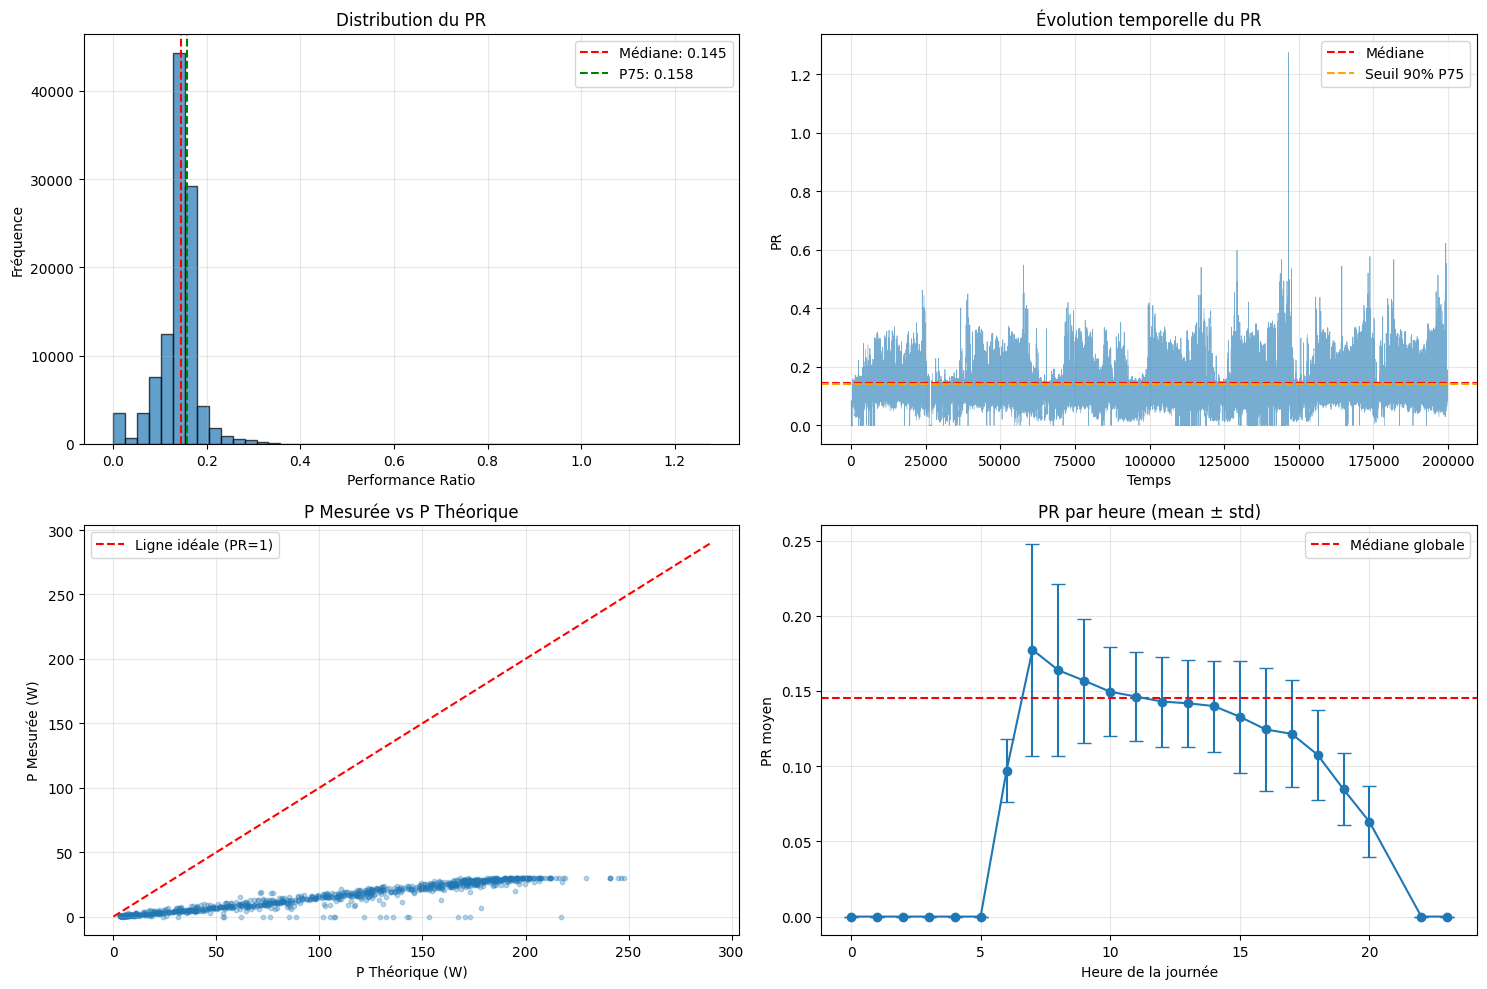

In [49]:
def diagnose_reference_panel(df, reference_physique_id, P_ref_theo_col):
    """
    Analyse le panneau de référence pour comprendre pourquoi il n'y a pas de corrections.
    """
    import matplotlib.pyplot as plt
    
    P_physique = df[reference_physique_id]
    P_theorique = df[P_ref_theo_col]
    
    # Calcul du PR
    mask_daylight = P_theorique > (P_theorique.max() * 0.01)
    PR = pd.Series(index=df.index, dtype=float)
    PR.loc[mask_daylight] = P_physique.loc[mask_daylight] / P_theorique.loc[mask_daylight]
    PR.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Statistiques
    print("📈 Distribution du Performance Ratio (PR):")
    print(PR.describe())
    print(f"\nPercentiles:")
    print(f"  P10: {PR.quantile(0.10):.4f}")
    print(f"  P25: {PR.quantile(0.25):.4f}")
    print(f"  P50: {PR.quantile(0.50):.4f}")
    print(f"  P75: {PR.quantile(0.75):.4f}")
    print(f"  P90: {PR.quantile(0.90):.4f}")
    
    # Visualisation
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Histogramme du PR
    axes[0, 0].hist(PR.dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].axvline(PR.median(), color='red', linestyle='--', label=f'Médiane: {PR.median():.3f}')
    axes[0, 0].axvline(PR.quantile(0.75), color='green', linestyle='--', label=f'P75: {PR.quantile(0.75):.3f}')
    axes[0, 0].set_xlabel('Performance Ratio')
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].set_title('Distribution du PR')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Série temporelle du PR
    axes[0, 1].plot(PR.index, PR, alpha=0.6, linewidth=0.5)
    axes[0, 1].axhline(PR.median(), color='red', linestyle='--', label='Médiane')
    axes[0, 1].axhline(PR.quantile(0.75) * 0.90, color='orange', linestyle='--', label='Seuil 90% P75')
    axes[0, 1].set_xlabel('Temps')
    axes[0, 1].set_ylabel('PR')
    axes[0, 1].set_title('Évolution temporelle du PR')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Comparaison P_physique vs P_theorique
    sample = df[mask_daylight].sample(min(1000, mask_daylight.sum()))
    axes[1, 0].scatter(sample[P_ref_theo_col], sample[reference_physique_id], 
                       alpha=0.3, s=10)
    axes[1, 0].plot([0, P_theorique.max()], [0, P_theorique.max()], 
                    'r--', label='Ligne idéale (PR=1)')
    axes[1, 0].set_xlabel('P Théorique (W)')
    axes[1, 0].set_ylabel('P Mesurée (W)')
    axes[1, 0].set_title('P Mesurée vs P Théorique')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. PR par heure de la journée
    df_temp = df.copy()
    # L'index peut ne pas être de type datetime ; extraire l'heure depuis la colonne 'measured_on' si présente
    if 'measured_on' in df_temp.columns:
        df_temp['hour'] = pd.to_datetime(df_temp['measured_on']).dt.hour
    else:
        # fallback : essayer d'utiliser l'index s'il est datetime-like
        try:
            df_temp.index = pd.to_datetime(df_temp.index)
            df_temp['hour'] = df_temp.index.hour
        except Exception:
            df_temp['hour'] = np.nan  # en dernier recours
    df_temp['PR'] = PR
    hourly_pr = df_temp[mask_daylight].groupby('hour')['PR'].agg(['mean', 'std'])
    axes[1, 1].errorbar(hourly_pr.index, hourly_pr['mean'], yerr=hourly_pr['std'], 
                        marker='o', capsize=5)
    axes[1, 1].axhline(PR.median(), color='red', linestyle='--', label='Médiane globale')
    axes[1, 1].set_xlabel('Heure de la journée')
    axes[1, 1].set_ylabel('PR moyen')
    axes[1, 1].set_title('PR par heure (mean ± std)')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return PR

# Utilisation
PR_diagnostic = diagnose_reference_panel(df, reference_inv, 'P_ref_theo')

In [50]:
def statistical_shading_detection(df, P_ref_final_col, power_cols, detection_threshold=0.95):
    """
    Calcule le Performance Ratio Statistique pour chaque string
    et identifie les périodes d'ombrage.
    """
    P_ref_final = df[P_ref_final_col]
    results = {}

    for col in power_cols:
        if col != reference_inv: # On ne compare pas la référence à elle-même
            
            # 1. Calcul du Ratio de Performance Statistique (RPS)
            # Normalisation par la référence hybride (P_ref_final)
            df[f'RPS_{col}'] = df[col] / P_ref_final
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            
            # 2. Détection: Identifier l'ombrage lorsque le RPS chute sous le seuil
            shading_mask = (df[f'RPS_{col}'] < detection_threshold) & (P_ref_final > 50) # On ignore la nuit

            # Stockage des résultats (à vous d'implémenter le clustering DBSCAN ici)
            results[col] = {
                'nbr_points_ombres': shading_mask.sum(),
                'ratio_ombage': shading_mask.sum() / len(df)
            }
            
            # Exemple: Stocker le masque pour un clustering ultérieur (DBSCAN)
            # df[f'Ombrage_{col}'] = shading_mask

    return results

results = statistical_shading_detection(df, 'P_ref_final', power_cols)
print(results)

{'inv_01_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_02_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_03_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_04_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_05_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_06_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_07_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_08_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_09_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_10_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_12_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_13_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_14_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_15_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_16_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_17_a

📈 Distribution du Performance Ratio (PR):
count    109802.000000
mean          0.139387
std           0.044262
min           0.000000
25%           0.127096
50%           0.145179
75%           0.158025
max           1.275120
dtype: float64

Percentiles:
  P10: 0.0879
  P25: 0.1271
  P50: 0.1452
  P75: 0.1580
  P90: 0.1725


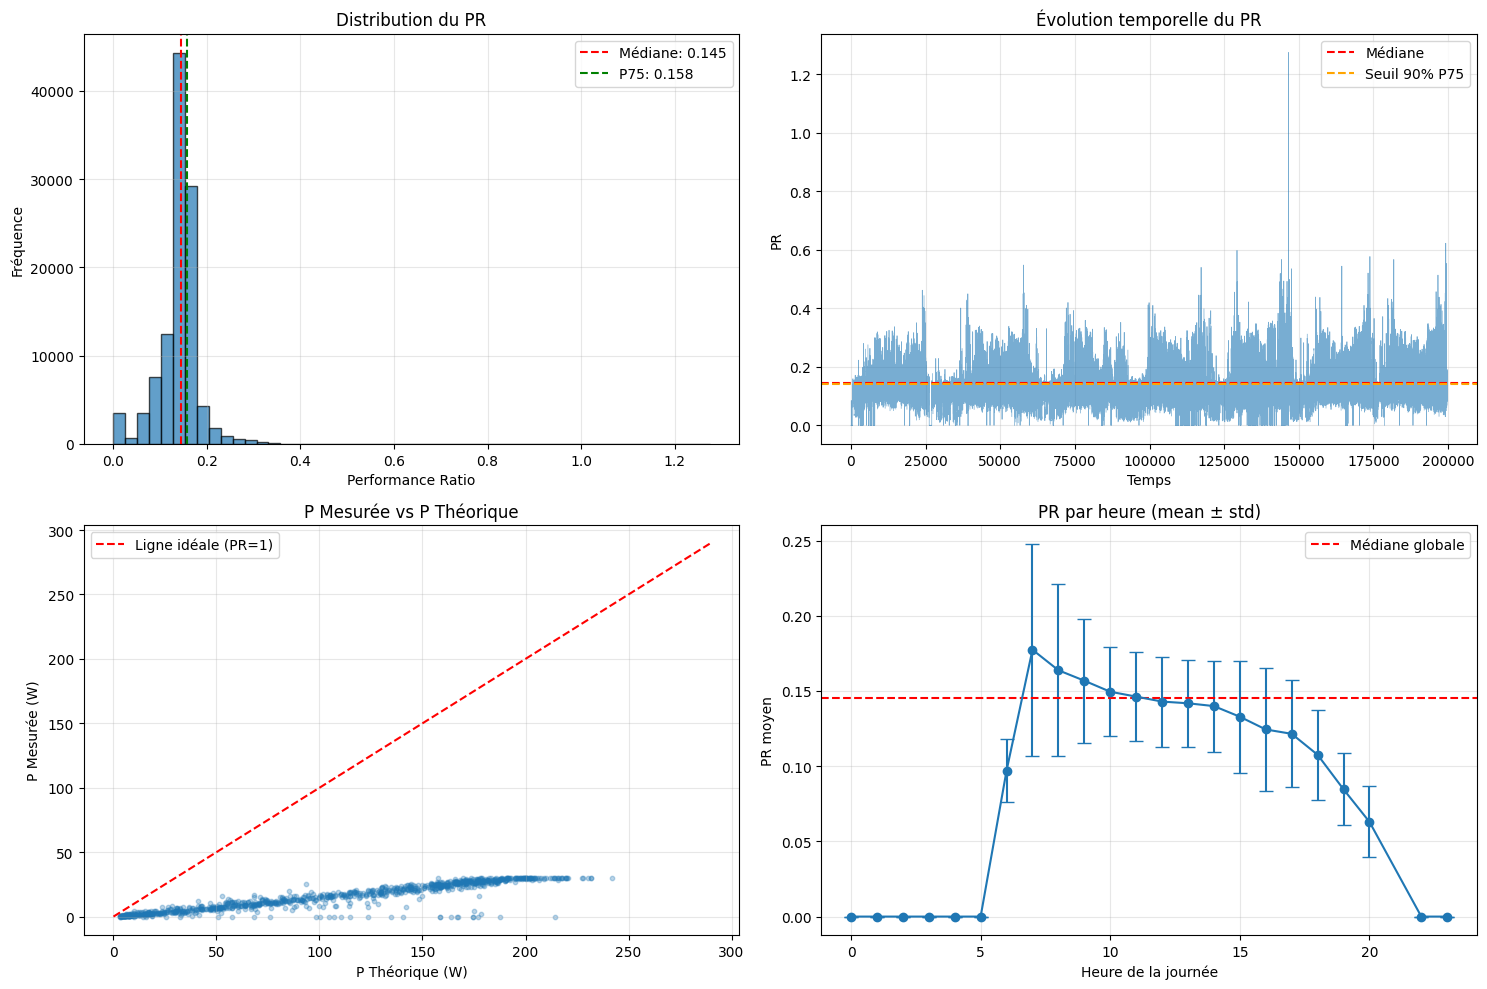

📊 Analyse du PR du panneau de référence:
   - PR Attendu (P75): 0.1580
   - PR Médian: 0.1452
   - Seuil de correction absolu: 0.1343 (85% du PR attendu)
   - Points en journée: 109802
   - Corrections appliquées: 36020 (32.80%)
{'inv_01_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_02_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_03_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_04_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_05_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_06_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_07_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_08_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_09_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_10_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_12_ac_power': {'nbr_points_ombres': 0, 'ratio_ombage': 0.0}, 'inv_13_ac_power': {'nbr_points_ombres': 0, 

In [52]:
# 1. Diagnostic du panneau de référence
PR_diagnostic = diagnose_reference_panel(df, reference_inv, 'P_ref_theo')

# 2. Création de la référence hybride avec le bon seuil
df['P_ref_final'], ref_stats = create_hybrid_reference(
    df, 
    reference_inv, 
    'P_ref_theo',
    correction_pr_threshold=0.85  # Ajustez selon le diagnostic
)

# 3. Détection d'ombrage sur les autres panneaux
results = statistical_shading_detection(df, 'P_ref_final', power_cols)
print(results)

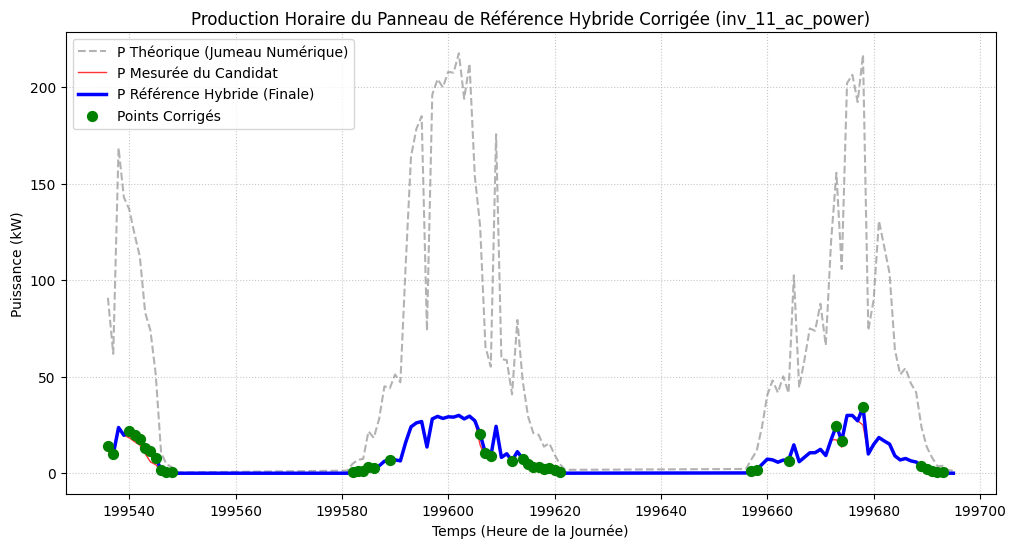

In [53]:
# CODE PYTHON CONCEPTUEL POUR L'AFFICHAGE

import matplotlib.pyplot as plt

# --- Hypothèses de données ---
# df est votre DataFrame contenant les données horaires ou infra-horaires
# P_ref_theo (Puissance théorique), P_ref_cand (Mesure du Candidat), P_ref_final (Référence Hybride)

# On prend un échantillon de 2 jours (pour illustrer le cycle jour/nuit et l'anomalie)
sample_data = df.tail(48 * 2) # Exemple sur 2 jours à pas de 30 min

plt.figure(figsize=(12, 6))

# 1. Puissance Théorique (Jumeau Numérique)
plt.plot(sample_data.index, sample_data['P_ref_theo'], label='P Théorique (Jumeau Numérique)', linestyle='--', color='gray', alpha=0.6)

# 2. Mesure du Panneau Candidat Primaire (avec une anomalie)
plt.plot(sample_data.index, sample_data[reference_inv], label='P Mesurée du Candidat', color='red', linewidth=1, alpha=0.8)

# 3. La Référence Hybride Finale (La ligne de base pour l'analyse)
plt.plot(sample_data.index, sample_data['P_ref_final'], label='P Référence Hybride (Finale)', color='blue', linewidth=2.5)

# Marquer l'événement de correction (où la référence est remplacée)
anomalies = sample_data[sample_data[reference_inv] != sample_data['P_ref_final']]
plt.scatter(anomalies.index, anomalies['P_ref_final'], color='green', marker='o', s=50, zorder=5, label='Points Corrigés')

plt.title(f"Production Horaire du Panneau de Référence Hybride Corrigée ({reference_inv})")
plt.xlabel("Temps (Heure de la Journée)")
plt.ylabel("Puissance (kW)")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Fin du code conceptuel

📊 Analyse du PR du panneau de référence:
   - PR Attendu (P75): 0.1580
   - PR Médian: 0.1452
   - Seuil de correction absolu: 0.1343 (85% du PR attendu)
   - Points en journée: 109802
   - Corrections appliquées: 36020 (32.80%)
🎨 VISUALISATION DE LA RÉFÉRENCE HYBRIDE

📈 Graphique 1: Vue d'ensemble (3 jours)
⚠️ Conversion de l'index en DatetimeIndex...
❌ Impossible de trouver une colonne de date. Utilisation de l'index numérique.


C:\Users\Claire\AppData\Local\Temp\ipykernel_78452\3295923791.py:174: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Claire\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


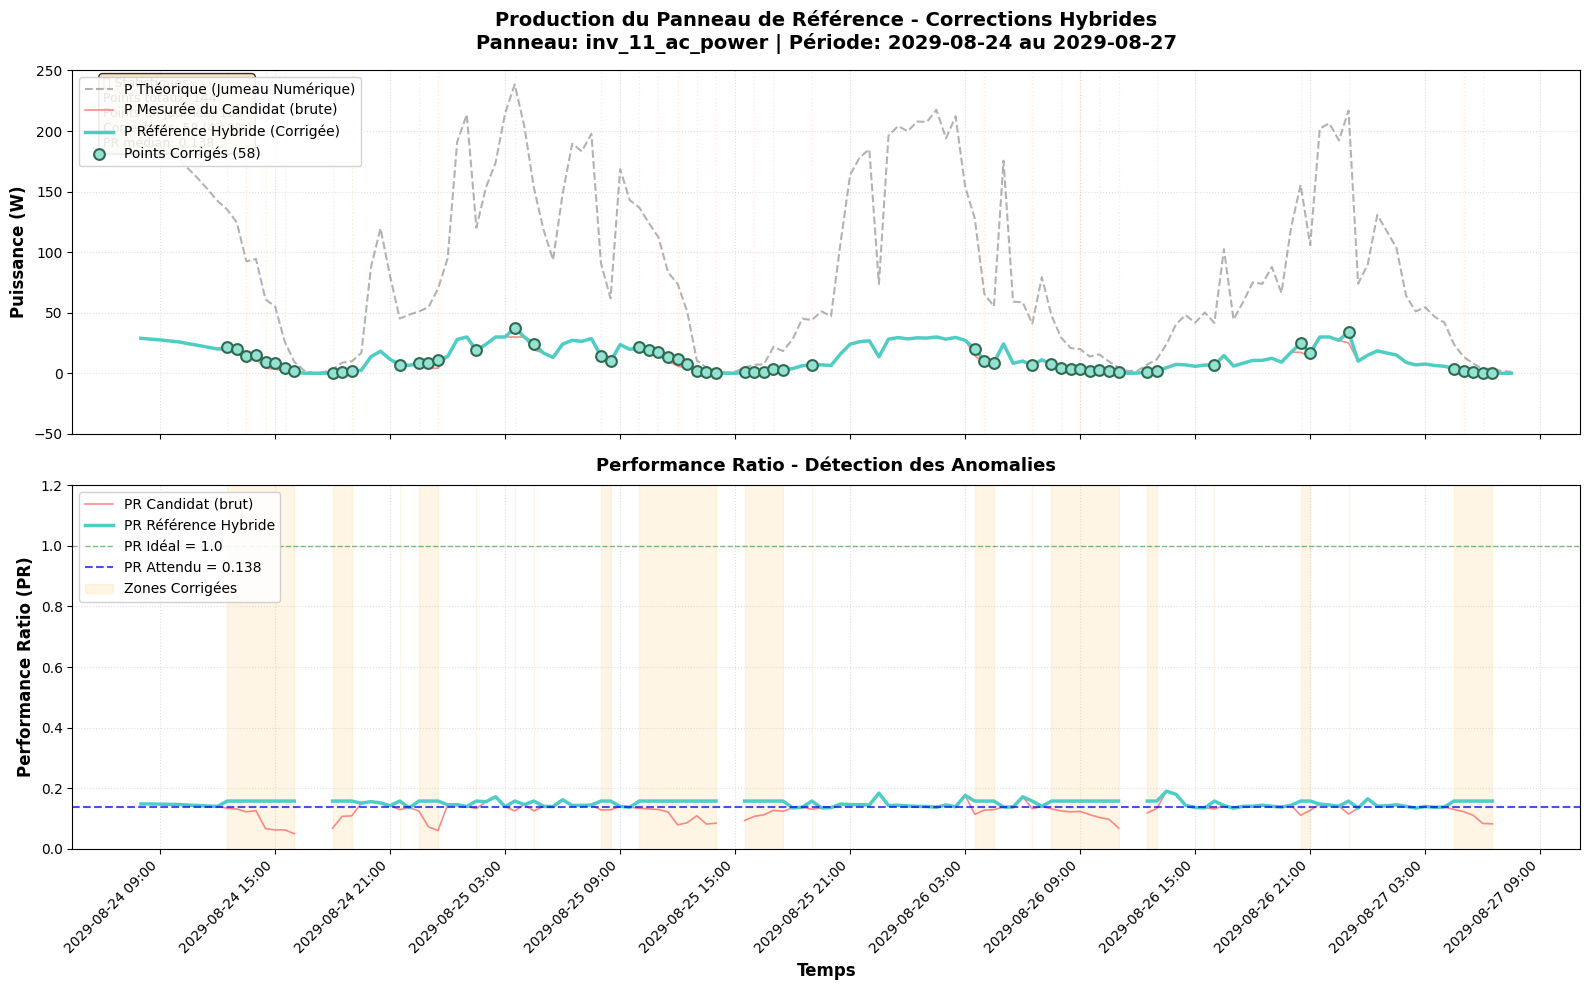


🔍 Graphique 2: Analyse détaillée des corrections


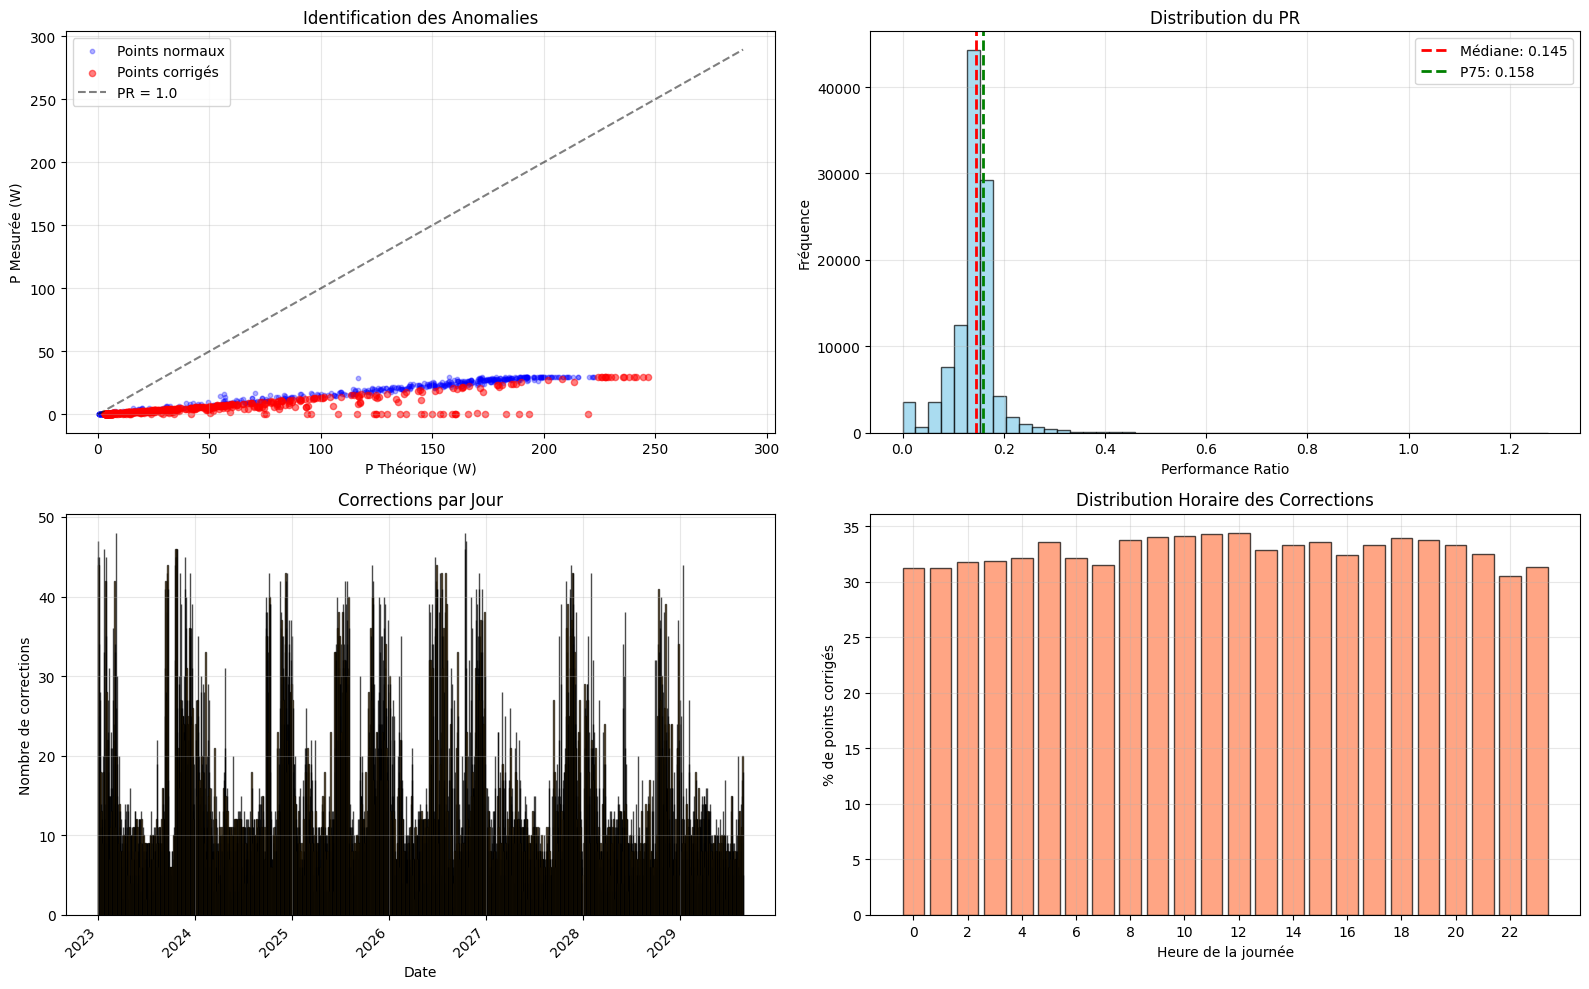


✅ Visualisation terminée!
⚠️ Conversion de l'index en DatetimeIndex...
❌ Impossible de trouver une colonne de date. Utilisation de l'index numérique.


C:\Users\Claire\AppData\Local\Temp\ipykernel_78452\3295923791.py:174: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Claire\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


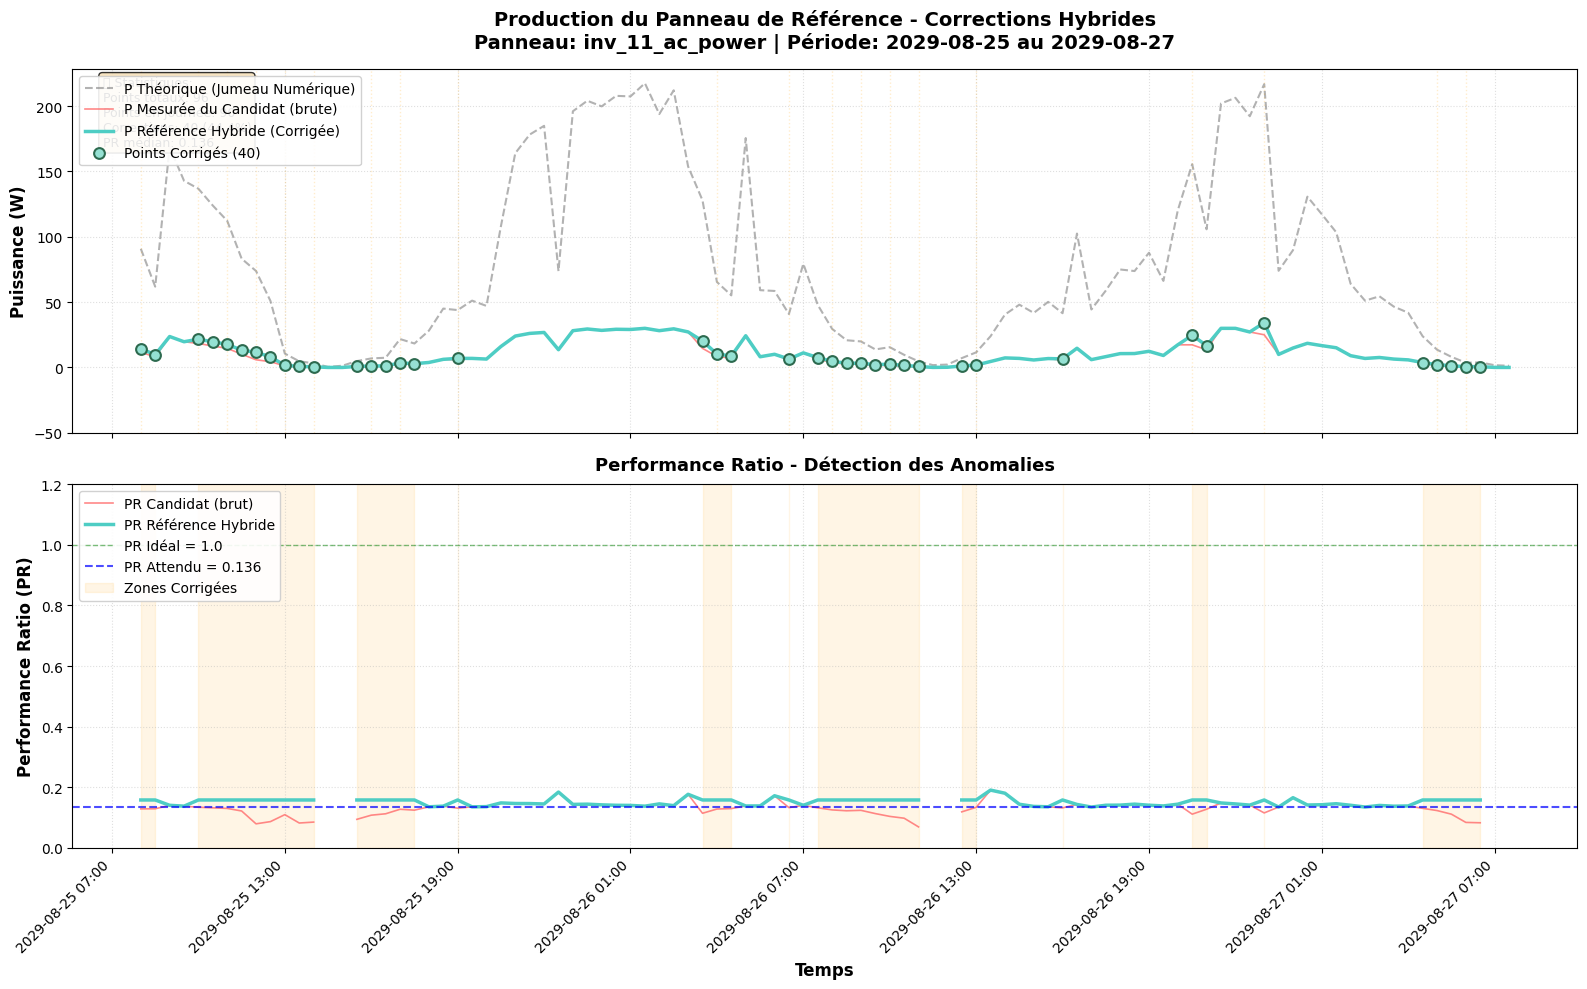

⚠️ Conversion de l'index en DatetimeIndex...
❌ Impossible de trouver une colonne de date. Utilisation de l'index numérique.


C:\Users\Claire\AppData\Local\Temp\ipykernel_78452\3295923791.py:174: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Claire\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


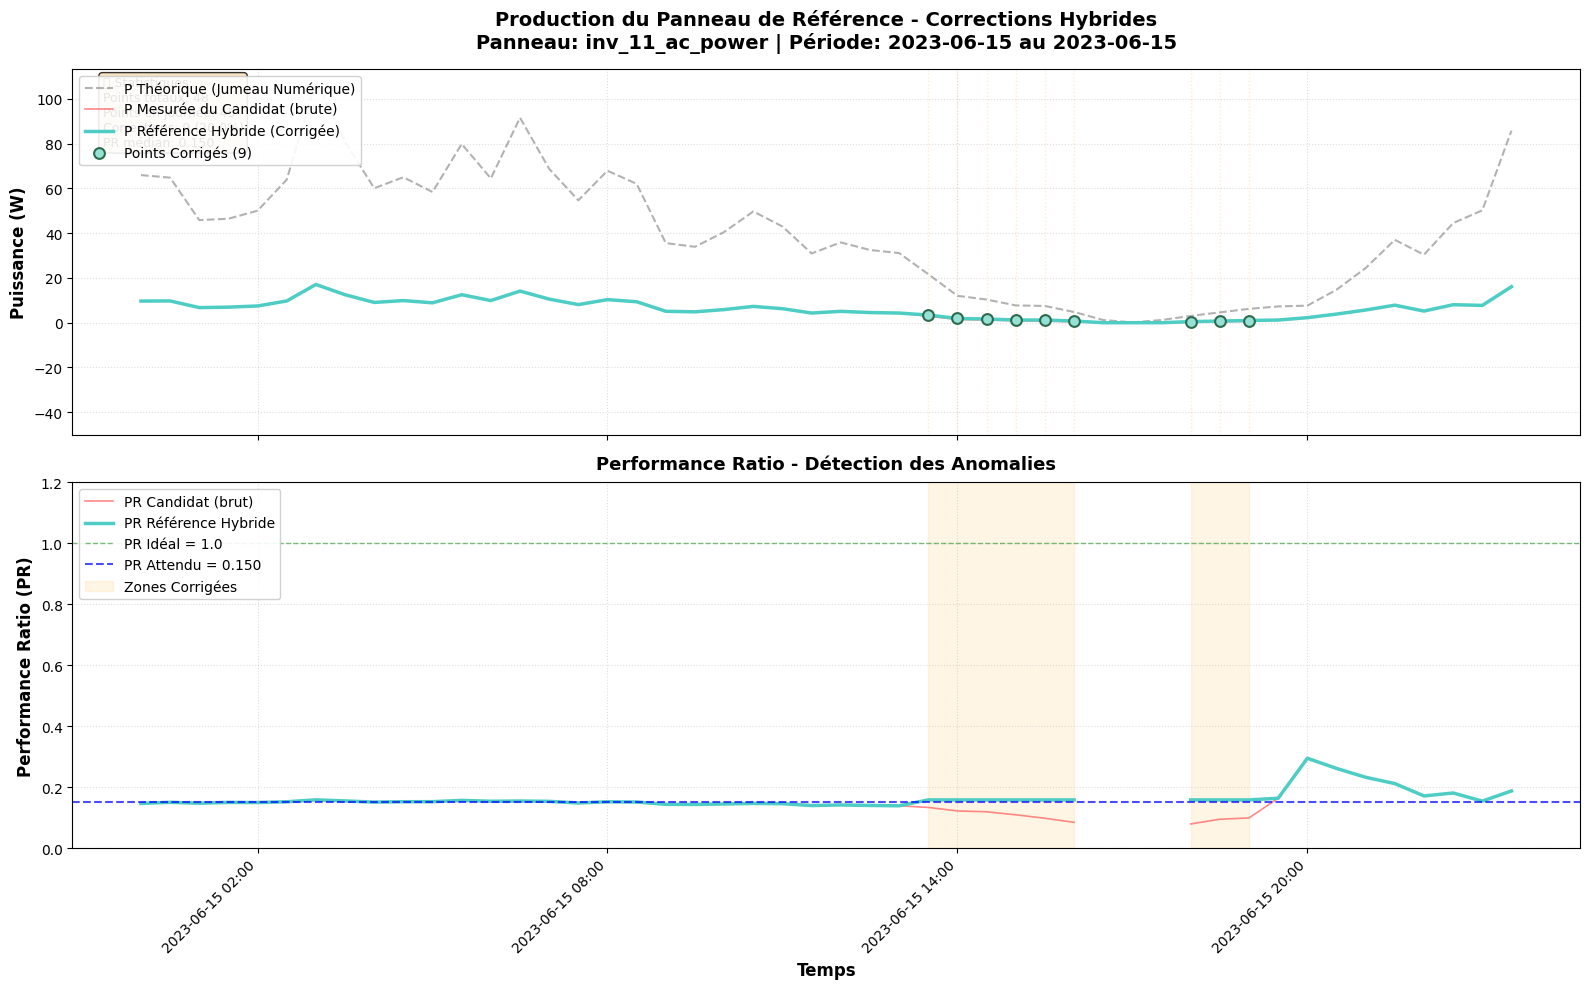

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

def plot_hybrid_reference(df, reference_inv, n_days=2, start_date=None):
    """
    Visualise la référence hybride avec corrections appliquées.
    
    Args:
        df: DataFrame avec colonnes 'P_ref_theo', reference_inv, 'P_ref_final'
        reference_inv: nom de la colonne du panneau de référence
        n_days: nombre de jours à afficher
        start_date: date de début (None = prendre les derniers n_days)
    """
    
    # Vérifier et convertir l'index en datetime si nécessaire
    df_work = df.copy()
    if not isinstance(df_work.index, pd.DatetimeIndex):
        print("⚠️ Conversion de l'index en DatetimeIndex...")
        if 'timestamp' in df_work.columns:
            df_work.index = pd.to_datetime(df_work['timestamp'])
        elif 'date' in df_work.columns:
            df_work.index = pd.to_datetime(df_work['date'])
        else:
            print("❌ Impossible de trouver une colonne de date. Utilisation de l'index numérique.")
            # Créer un index datetime fictif basé sur la position
            df_work.index = pd.date_range(start='2023-01-01', periods=len(df_work), freq='30min')
    
    # Sélection de la période
    if start_date is not None:
        mask = (df_work.index >= start_date) & (df_work.index < start_date + pd.Timedelta(days=n_days))
        sample_data = df_work[mask].copy()
    else:
        sample_data = df_work.tail(48 * n_days).copy()  # 48 points par jour si données 30min
    
    if len(sample_data) == 0:
        print("❌ Aucune donnée dans la période sélectionnée")
        return
    
    # Identification des points corrigés
    # Un point est corrigé si P_ref_final != P_physique (avec tolérance)
    tolerance = 1e-6
    sample_data['is_corrected'] = np.abs(
        sample_data['P_ref_final'] - sample_data[reference_inv]
    ) > tolerance
    
    corrections = sample_data[sample_data['is_corrected']]
    
    # Création de la figure
    fig, axes = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
    
    # ========== GRAPHIQUE 1: Puissances ==========
    ax1 = axes[0]
    
    # Puissance théorique (ligne de fond)
    ax1.plot(sample_data.index, sample_data['P_ref_theo'], 
             label='P Théorique (Jumeau Numérique)', 
             linestyle='--', color='gray', linewidth=1.5, alpha=0.6)
    
    # Mesure du panneau candidat (avec anomalies)
    ax1.plot(sample_data.index, sample_data[reference_inv], 
             label='P Mesurée du Candidat (brute)', 
             color='#FF6B6B', linewidth=1.2, alpha=0.8)
    
    # Référence hybride finale
    ax1.plot(sample_data.index, sample_data['P_ref_final'], 
             label='P Référence Hybride (Corrigée)', 
             color='#4ECDC4', linewidth=2.5, zorder=3)
    
    # Marquer les points corrigés
    if len(corrections) > 0:
        ax1.scatter(corrections.index, corrections['P_ref_final'], 
                   color='#95E1D3', marker='o', s=60, 
                   edgecolors='#2D6A4F', linewidth=1.5,
                   zorder=5, label=f'Points Corrigés ({len(corrections)})')
        
        # Ajouter des lignes verticales pour les corrections
        for idx in corrections.index[::max(1, len(corrections)//20)]:  # Max 20 lignes
            ax1.axvline(idx, color='orange', alpha=0.2, linestyle=':', linewidth=1)
    
    ax1.set_ylabel('Puissance (W)', fontsize=12, fontweight='bold')
    
    # Format du titre avec gestion de l'index
    try:
        start_str = sample_data.index[0].strftime("%Y-%m-%d")
        end_str = sample_data.index[-1].strftime("%Y-%m-%d")
        title = (f'Production du Panneau de Référence - Corrections Hybrides\n'
                f'Panneau: {reference_inv} | Période: {start_str} au {end_str}')
    except AttributeError:
        # Si l'index n'est pas datetime
        title = (f'Production du Panneau de Référence - Corrections Hybrides\n'
                f'Panneau: {reference_inv} | Points: {len(sample_data)}')
    
    ax1.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax1.legend(loc='upper left', fontsize=10, framealpha=0.9)
    ax1.grid(True, linestyle=':', alpha=0.4)
    ax1.set_ylim(bottom=-50)  # Éviter les valeurs négatives
    
    # ========== GRAPHIQUE 2: Performance Ratio ==========
    ax2 = axes[1]
    
    # Calcul du PR pour la visualisation
    mask_daylight = sample_data['P_ref_theo'] > (df['P_ref_theo'].max() * 0.01)
    
    PR_candidat = pd.Series(index=sample_data.index, dtype=float)
    PR_candidat.loc[mask_daylight] = (
        sample_data.loc[mask_daylight, reference_inv] / 
        sample_data.loc[mask_daylight, 'P_ref_theo']
    )
    PR_candidat.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    PR_final = pd.Series(index=sample_data.index, dtype=float)
    PR_final.loc[mask_daylight] = (
        sample_data.loc[mask_daylight, 'P_ref_final'] / 
        sample_data.loc[mask_daylight, 'P_ref_theo']
    )
    PR_final.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Tracer les PR
    ax2.plot(sample_data.index, PR_candidat, 
             label='PR Candidat (brut)', 
             color='#FF6B6B', linewidth=1.2, alpha=0.8)
    
    ax2.plot(sample_data.index, PR_final, 
             label='PR Référence Hybride', 
             color='#4ECDC4', linewidth=2.5)
    
    # Ligne de référence PR = 1
    ax2.axhline(1.0, color='green', linestyle='--', linewidth=1, 
                alpha=0.5, label='PR Idéal = 1.0')
    
    # PR attendu (médiane)
    pr_attendu = PR_candidat.median()
    if not np.isnan(pr_attendu):
        ax2.axhline(pr_attendu, color='blue', linestyle='--', linewidth=1.5, 
                   alpha=0.7, label=f'PR Attendu = {pr_attendu:.3f}')
    
    # Zones d'anomalie (optionnel)
    if len(corrections) > 0:
        ax2.fill_between(sample_data.index, 0, 1.2, 
                        where=sample_data['is_corrected'],
                        alpha=0.1, color='orange', label='Zones Corrigées')
    
    ax2.set_xlabel('Temps', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Performance Ratio (PR)', fontsize=12, fontweight='bold')
    ax2.set_title('Performance Ratio - Détection des Anomalies', 
                  fontsize=13, fontweight='bold', pad=10)
    ax2.legend(loc='upper left', fontsize=10, framealpha=0.9)
    ax2.grid(True, linestyle=':', alpha=0.4)
    ax2.set_ylim([0, 1.2])
    
    # Format de l'axe des dates
    if isinstance(sample_data.index, pd.DatetimeIndex):
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
        ax2.xaxis.set_major_locator(mdates.HourLocator(interval=6))
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    else:
        plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Statistiques en encadré
    stats_text = (
        f"📊 Statistiques:\n"
        f"Points totaux: {len(sample_data)}\n"
        f"Points en journée: {mask_daylight.sum()}\n"
        f"Corrections: {len(corrections)} ({len(corrections)/mask_daylight.sum()*100:.1f}%)\n"
        f"PR médian: {pr_attendu:.3f}"
    )
    
    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
             fontsize=9, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    return fig


def plot_correction_details(df, reference_inv, sample_size=500):
    """
    Visualise en détail les corrections appliquées.
    """
    # Vérifier et convertir l'index en datetime si nécessaire
    df_work = df.copy()
    if not isinstance(df_work.index, pd.DatetimeIndex):
        if 'timestamp' in df_work.columns:
            df_work.index = pd.to_datetime(df_work['timestamp'])
        elif 'date' in df_work.columns:
            df_work.index = pd.to_datetime(df_work['date'])
        else:
            df_work.index = pd.date_range(start='2023-01-01', periods=len(df_work), freq='30min')
    
    # Identifier les corrections
    tolerance = 1e-6
    df_work['is_corrected'] = np.abs(
        df_work['P_ref_final'] - df_work[reference_inv]
    ) > tolerance
    
    corrections = df_work[df_work['is_corrected']]
    normal = df_work[~df_work['is_corrected']]
    
    # Échantillonnage si nécessaire
    if len(corrections) > sample_size:
        corrections_sample = corrections.sample(sample_size)
    else:
        corrections_sample = corrections
        
    if len(normal) > sample_size:
        normal_sample = normal.sample(sample_size)
    else:
        normal_sample = normal
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # 1. Scatter: P_mesurée vs P_théorique
    ax1 = axes[0, 0]
    ax1.scatter(normal_sample['P_ref_theo'], normal_sample[reference_inv],
               alpha=0.3, s=10, color='blue', label='Points normaux')
    ax1.scatter(corrections_sample['P_ref_theo'], corrections_sample[reference_inv],
               alpha=0.5, s=20, color='red', label='Points corrigés')
    
    max_p = df['P_ref_theo'].max()
    ax1.plot([0, max_p], [0, max_p], 'k--', alpha=0.5, label='PR = 1.0')
    ax1.set_xlabel('P Théorique (W)')
    ax1.set_ylabel('P Mesurée (W)')
    ax1.set_title('Identification des Anomalies')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Distribution du PR
    ax2 = axes[0, 1]
    mask_day = df_work['P_ref_theo'] > (df_work['P_ref_theo'].max() * 0.01)
    PR_all = df_work.loc[mask_day, reference_inv] / df_work.loc[mask_day, 'P_ref_theo']
    PR_all = PR_all.replace([np.inf, -np.inf], np.nan).dropna()
    
    ax2.hist(PR_all, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.axvline(PR_all.median(), color='red', linestyle='--', 
               linewidth=2, label=f'Médiane: {PR_all.median():.3f}')
    ax2.axvline(PR_all.quantile(0.75), color='green', linestyle='--',
               linewidth=2, label=f'P75: {PR_all.quantile(0.75):.3f}')
    ax2.set_xlabel('Performance Ratio')
    ax2.set_ylabel('Fréquence')
    ax2.set_title('Distribution du PR')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Timeline des corrections
    ax3 = axes[1, 0]
    df_work['correction_flag'] = df_work['is_corrected'].astype(int)
    daily_corrections = df_work.resample('D')['correction_flag'].sum()
    
    ax3.bar(daily_corrections.index, daily_corrections.values, 
           color='orange', alpha=0.7, edgecolor='black')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Nombre de corrections')
    ax3.set_title('Corrections par Jour')
    ax3.grid(True, alpha=0.3)
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # 4. Corrections par heure de la journée
    ax4 = axes[1, 1]
    df_work['hour'] = df_work.index.hour
    hourly_corrections = df_work[df_work['is_corrected']].groupby('hour').size()
    hourly_total = df_work[mask_day].groupby(df_work[mask_day].index.hour).size()
    hourly_pct = (hourly_corrections / hourly_total * 100).fillna(0)
    
    ax4.bar(hourly_pct.index, hourly_pct.values, 
           color='coral', alpha=0.7, edgecolor='black')
    ax4.set_xlabel('Heure de la journée')
    ax4.set_ylabel('% de points corrigés')
    ax4.set_title('Distribution Horaire des Corrections')
    ax4.set_xticks(range(0, 24, 2))
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig


# ============ FONCTION D'UTILISATION COMPLÈTE ============

def visualize_hybrid_reference_complete(df, reference_inv, n_days=3):
    """
    Affichage complet de la référence hybride.
    """
    print("=" * 80)
    print("🎨 VISUALISATION DE LA RÉFÉRENCE HYBRIDE")
    print("=" * 80)
    
    # Vérifications
    required_cols = ['P_ref_theo', reference_inv, 'P_ref_final']
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        print(f"❌ Colonnes manquantes: {missing}")
        return
    
    # 1. Vue d'ensemble sur n_days
    print(f"\n📈 Graphique 1: Vue d'ensemble ({n_days} jours)")
    fig1 = plot_hybrid_reference(df, reference_inv, n_days=n_days)
    plt.show()
    
    # 2. Détails des corrections
    print(f"\n🔍 Graphique 2: Analyse détaillée des corrections")
    fig2 = plot_correction_details(df, reference_inv)
    plt.show()
    
    print("\n✅ Visualisation terminée!")
# ============ EXEMPLE D'UTILISATION ============

# Après avoir créé votre référence hybride:
df['P_ref_final'], ref_stats = create_hybrid_reference(
    df, reference_inv, 'P_ref_theo', correction_pr_threshold=0.85
)

# Visualisation complète:
visualize_hybrid_reference_complete(df, reference_inv, n_days=3)

# Ou juste la vue principale:
plot_hybrid_reference(df, reference_inv, n_days=2)
plt.show()

# Pour une date spécifique:
start = pd.Timestamp('2023-06-15')
plot_hybrid_reference(df, reference_inv, n_days=1, start_date=start)
plt.show()
